
#  Install some packages


Rasterio is a library for working with geospatial images (like satellite data) in Python.  rasterio was installed to analyze, manipulate, and visualize these images without needing a local setup. It offers easy access to geospatial data analysis.

## **Rasterio**

**

In [1]:
!pip install rasterio


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.5/21.5 MB 37.7 MB/s eta 0:00:00


### **EarthPy**

**EarthPy** simplifies complex geospatial workflows by offering a user-friendly interface for common tasks like data manipulation, image processing, and visualization. Its integration with Matplotlib allows for seamless plotting of geospatial data, enabling users to create informative and visually appealing maps and figures. Whether a researcher analyzing environmental trends, a GIS specialist mapping land cover changes, or a student learning about remote sensing, EarthPy offers a powerful set of tools to support your geospatial analysis needs. With its extensive documentation and community support, EarthPy is a valuable resource for anyone working with geospatial data in Python.

In [2]:
!pip install earthpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 4.4 MB/s eta 0:00:00



## Import packages

In [3]:
# Import packages
import pandas as pd
import numpy as np
import keras
from keras import Model
import rasterio
import earthpy.plot as ep
from keras.utils import to_categorical, plot_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import matplotlib
import matplotlib.pyplot as plt

## **Google Drive Mounting**

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


IMPORTING TRAINING DATASET

In [5]:
train_PATH = '/content/drive/MyDrive/data3/train_dataset.csv'
FEATURES = ['B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8', 'B8A', 'B9', 'evi', 'mndwi', 'ndbi', 'bsi', 'dem', 'ndvi', 'slope']
LABEL = ['agbd']
train = pd.read_csv(train_PATH)[FEATURES+LABEL]
train

B1        B2        B3        B4        B5        B6        B7  \
0     0.028404  0.028450  0.044902  0.030094  0.072756  0.201718  0.239731   
1     0.032820  0.035295  0.056019  0.037981  0.088770  0.245732  0.298640   
2     0.024399  0.026884  0.045573  0.027923  0.080504  0.256226  0.310183   
3     0.027710  0.031021  0.050084  0.032753  0.087840  0.217727  0.265088   
4     0.027820  0.028300  0.045413  0.028191  0.076453  0.237423  0.285635   
...        ...       ...       ...       ...       ...       ...       ...   
1195  0.027434  0.031411  0.051711  0.033111  0.085821  0.228097  0.274563   
1196  0.025513  0.027515  0.042413  0.026620  0.072341  0.234981  0.293674   
1197  0.033856  0.035791  0.059561  0.036005  0.098233  0.282017  0.334782   
1198  0.026374  0.028072  0.046335  0.029210  0.078775  0.229669  0.274390   
1199  0.028466  0.033852  0.052813  0.035449  0.085444  0.242955  0.301050   

            B8       B8A        B9       evi     mndwi      ndbi       bsi  \
0     0.249578  0.267330  0.288353  0.459078 -0.562485 -0.268975 -0.237573   
1     0.304082  0.324511  0.328839  0.523662 -0.538530 -0.255184 -0.218634   
2     0.319038  0.336021  0.333250  0.565383 -0.566680 -0.322413 -0.287818   
3     0.272936  0.295738  0.293237  0.488420 -0.530389 -0.287062 -0.250842   
4     0.292365  0.311976  0.326327  0.522817 -0.579605 -0.267435 -0.240223   
...        ...       ...       ...       ...       ...       ...       ...   
1195  0.276421  0.299448  0.305580  0.490827 -0.529676 -0.250759 -0.217184   
1196  0.299651  0.321122  0.321955  0.543969 -0.555755 -0.321255 -0.288406   
1197  0.341522  0.366854  0.364001  0.592963 -0.516786 -0.291123 -0.257511   
1198  0.282821  0.302334  0.306565  0.508222 -0.562910 -0.268723 -0.240028   
1199  0.304631  0.330138  0.347530  0.535746 -0.550691 -0.275824 -0.243692   

             dem      ndvi      slope        agbd  
0      966.37660  0.809682  18.655373   54.000000  
1      867.96290  0.772567   5.109927   94.000000  
2     1011.48990  0.842190  20.350618   64.794160  
3      817.32117  0.787873  20.777320  107.000000  
4      888.37726  0.816750  22.764280   71.000000  
...          ...       ...        ...         ...  
1195   929.69440  0.784357   5.616698   68.759403  
1196  1006.39545  0.834971  25.940838  202.000000  
1197  1111.20200  0.803743  26.552840   53.000000  
1198   844.35376  0.811985   5.364337  174.362940  
1199   992.52527  0.790628  10.721553   81.000000  

[1200 rows x 18 columns]

IMPORTING TESTING DATASET

In [6]:

test_PATH = '/content/drive/MyDrive/data3/Test_dataset.csv'
test = pd.read_csv(test_PATH)[FEATURES+LABEL]
test

B1        B2        B3        B4        B5        B6        B7  \
0    0.030203  0.030453  0.049442  0.033002  0.085158  0.227884  0.265665   
1    0.031377  0.033720  0.052883  0.038024  0.086885  0.211154  0.249819   
2    0.026242  0.029020  0.044466  0.027824  0.071871  0.214888  0.261118   
3    0.023882  0.027196  0.048311  0.031144  0.081971  0.248849  0.299021   
4    0.028029  0.031693  0.051711  0.036083  0.084892  0.249143  0.301674   
..        ...       ...       ...       ...       ...       ...       ...   
195  0.028838  0.032658  0.050742  0.035698  0.085153  0.219690  0.263639   
196  0.029116  0.029315  0.044778  0.027702  0.072140  0.207592  0.248742   
197  0.027106  0.031459  0.048251  0.030190  0.076581  0.254592  0.325759   
198  0.027760  0.029481  0.048321  0.029113  0.080857  0.253346  0.308264   
199  0.024311  0.027885  0.045196  0.029887  0.075327  0.219629  0.264391   

           B8       B8A        B9       evi     mndwi      ndbi       bsi  \
0    0.273492  0.291578  0.297986  0.480514 -0.538313 -0.243721 -0.211845   
1    0.254808  0.273784  0.289296  0.434763 -0.534675 -0.221740 -0.177309   
2    0.269022  0.287569  0.300098  0.491024 -0.543199 -0.282140 -0.254409   
3    0.304586  0.324961  0.324362  0.531323 -0.544010 -0.306384 -0.265067   
4    0.299711  0.329446  0.336323  0.526290 -0.542255 -0.277987 -0.241183   
..        ...       ...       ...       ...       ...       ...       ...   
195  0.272676  0.292862  0.306681  0.488092 -0.517542 -0.301796 -0.257298   
196  0.253158  0.274933  0.285940  0.464737 -0.571876 -0.231850 -0.208372   
197  0.326999  0.354770  0.366766  0.583700 -0.523616 -0.367532 -0.329878   
198  0.315358  0.337854  0.353811  0.565835 -0.563411 -0.300550 -0.272493   
199  0.268798  0.289698  0.305450  0.483689 -0.574793 -0.230609 -0.201208   

            dem      ndvi      slope        agbd  
0    1277.57000  0.786150  20.521326  171.510626  
1    1061.18920  0.737265  10.028896   67.682096  
2    1033.91800  0.822582  14.135793   63.228717  
3    1160.50260  0.803360   5.449010   83.000000  
4    1038.25290  0.785978  13.685775  132.000000  
..          ...       ...        ...         ...  
195   969.32837  0.779383  24.421524  176.000000  
196   870.17413  0.807758  19.789328   34.000000  
197   954.37335  0.828994  10.880277   79.090819  
198   931.80164  0.827801  23.298193  110.000000  
199   773.62115  0.797283  12.619820   54.000000  

[200 rows x 18 columns]

DESCRIBING THE DATASET

In [7]:
train.describe()

B1           B2           B3           B4           B5  \
count  1200.000000  1200.000000  1200.000000  1200.000000  1200.000000   
mean      0.029566     0.032392     0.051561     0.035022     0.085420   
std       0.004192     0.004967     0.006317     0.007282     0.009376   
min       0.020672     0.019808     0.034398     0.020624     0.059590   
25%       0.026809     0.029017     0.047107     0.030191     0.078829   
50%       0.028708     0.031553     0.050953     0.033485     0.084814   
75%       0.031794     0.034889     0.055416     0.038483     0.091509   
max       0.052047     0.059262     0.083182     0.085188     0.127292   

                B6           B7           B8          B8A           B9  \
count  1200.000000  1200.000000  1200.000000  1200.000000  1200.000000   
mean      0.230803     0.277241     0.282780     0.304388     0.316311   
std       0.021439     0.028026     0.026974     0.028772     0.030274   
min       0.165269     0.188564     0.192756     0.212592     0.218836   
25%       0.216516     0.258649     0.265015     0.285465     0.296398   
50%       0.229406     0.275154     0.280984     0.302409     0.314159   
75%       0.244286     0.295138     0.299725     0.322644     0.334719   
max       0.331107     0.387212     0.388871     0.408583     0.410599   

               evi        mndwi         ndbi          bsi          dem  \
count  1200.000000  1200.000000  1200.000000  1200.000000  1200.000000   
mean      0.495786    -0.540928    -0.258004    -0.223605   953.283893   
std       0.054974     0.025417     0.059392     0.058902   177.216228   
min       0.254229    -0.612235    -0.387279    -0.349999   357.021200   
25%       0.466426    -0.559735    -0.296374    -0.260711   835.772978   
50%       0.496272    -0.542925    -0.267229    -0.233367   949.311250   
75%       0.528644    -0.525598    -0.232299    -0.198962  1089.336750   
max       0.655970    -0.448780     0.068231     0.085949  1334.070600   

              ndvi        slope         agbd  
count  1200.000000  1200.000000  1200.000000  
mean      0.780693    16.287554   110.578908  
std       0.050525     7.639878    63.319859  
min       0.437857     2.339508    34.000000  
25%       0.764472    10.072716    70.000000  
50%       0.791923    15.455403    97.898476  
75%       0.812044    21.744965   134.000000  
max       0.871573    39.495033   669.000000

## **IMPORTING IMAGE DATA FOE BIOMASS MAPPING**

In [ ]:
IMAGE_PATH = '/content/drive/MyDrive/data2/S2_image4.tif'

In [ ]:
# Load image
image = rasterio.open(IMAGE_PATH)
bandNum = image.count
height = image.height
width = image.width
crs = image.crs
transform = image.transform
shape = (height, width)

image_vis = []
for x in [4,3,2]:
  image_vis.append(image.read(x))
image_vis = np.stack(image_vis)

plot_size = (8, 8)
ep.plot_rgb(
  image_vis,
  figsize=plot_size,
  stretch=True,
)

RasterioIOError: /content/drive/MyDrive/data2/S2_image4.tif: No such file or directory

## **EDA**

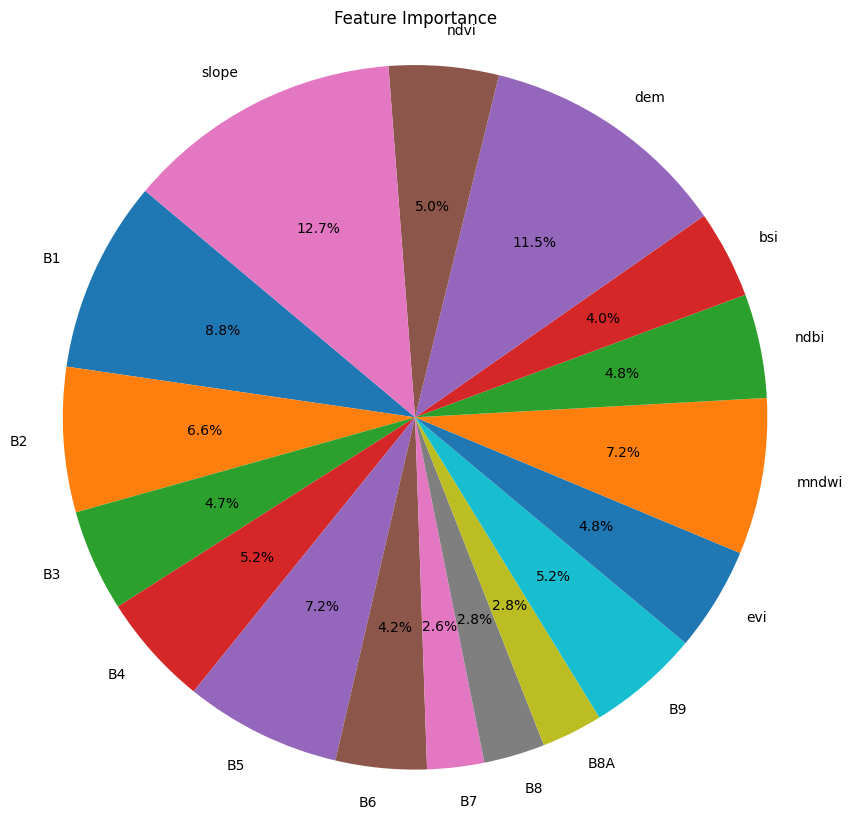

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor

#
# Separate features and target
X = train[FEATURES]
y = train[LABEL]

# Train a Random Forest model
rf = RandomForestRegressor( random_state=47)
rf.fit(X, y.values.ravel())

# Get feature importances
feature_importances = rf.feature_importances_

# Plot the pie chart
plt.figure(figsize=(10, 10))
plt.pie(feature_importances, labels=FEATURES, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Feature Importance')
plt.show()

OBSERVATION:
1.Slop and dem values give higher importance

2.B7,B8,B8A are least importance

3.the rest of features are in 4% to 8%

## Correlation Chart

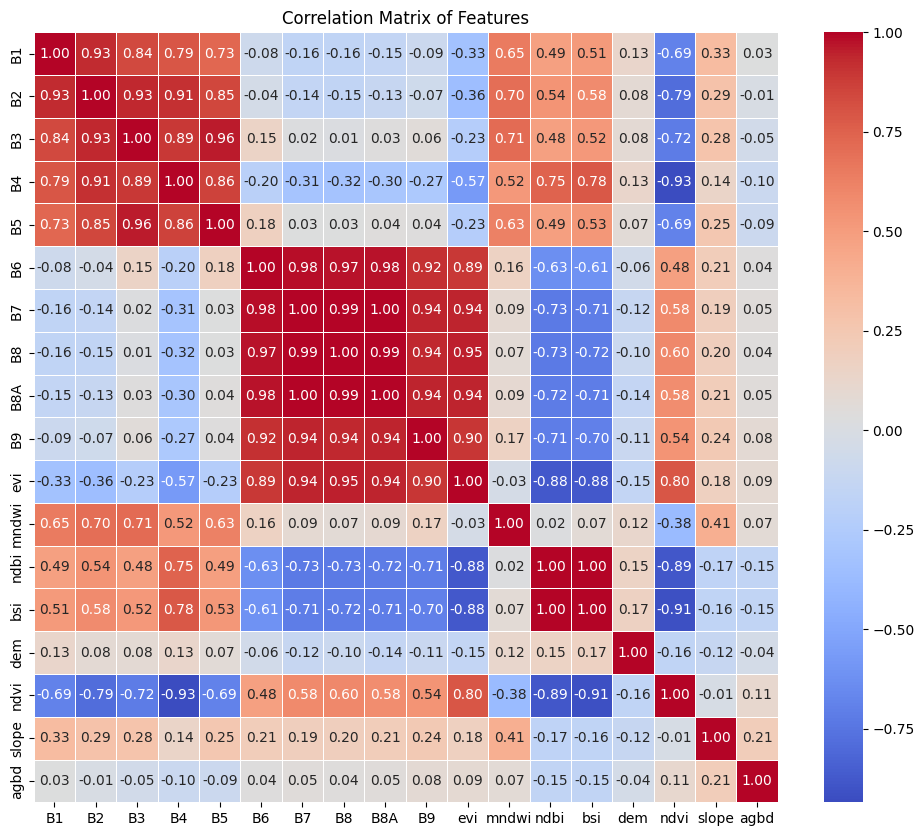

In [ ]:
import seaborn as sns

correlation_matrix = train.corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Features')
plt.show()

HISTOGRAM VISUALIZATION

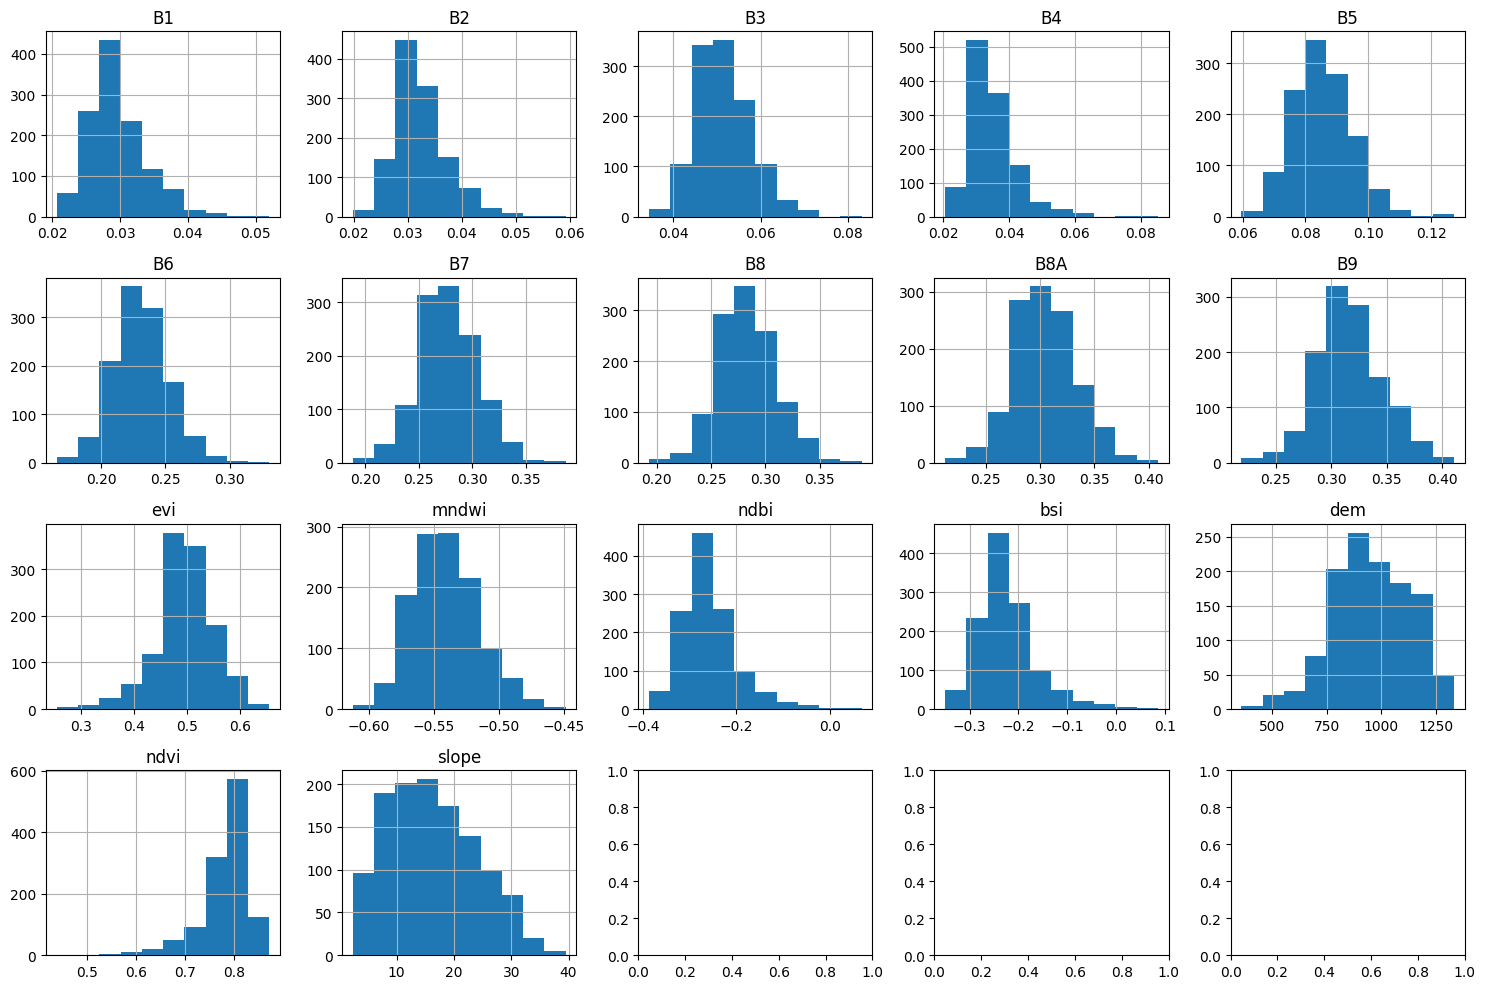

In [ ]:
# Create a figure for plotting multiple histograms
fig, axes = plt.subplots(nrows=4, ncols=5, figsize=(15, 10))
axes = axes.ravel()  # Flatten the subplot grid for easier iteration

# Loop through each feature and create a histogram on a separate subplot
for i, feature in enumerate(FEATURES):
    train[feature].hist(ax=axes[i])
    axes[i].set_title(feature)

# Adjust layout and spacing
plt.tight_layout()

# Display the histograms
plt.show()

## **Pairwise Feature Visualization**

It used to visually explore the relationships between different features in the dataset. It is particularly helpful in identifying potential correlations or patterns that may exist between pairs of features, which can inform subsequent data analysis, feature selection, or modeling decisions. Additionally, the pairplot can provide insights into the distribution and spread of data points across different feature combinations, aiding in understanding the dataset's structure and characteristics.

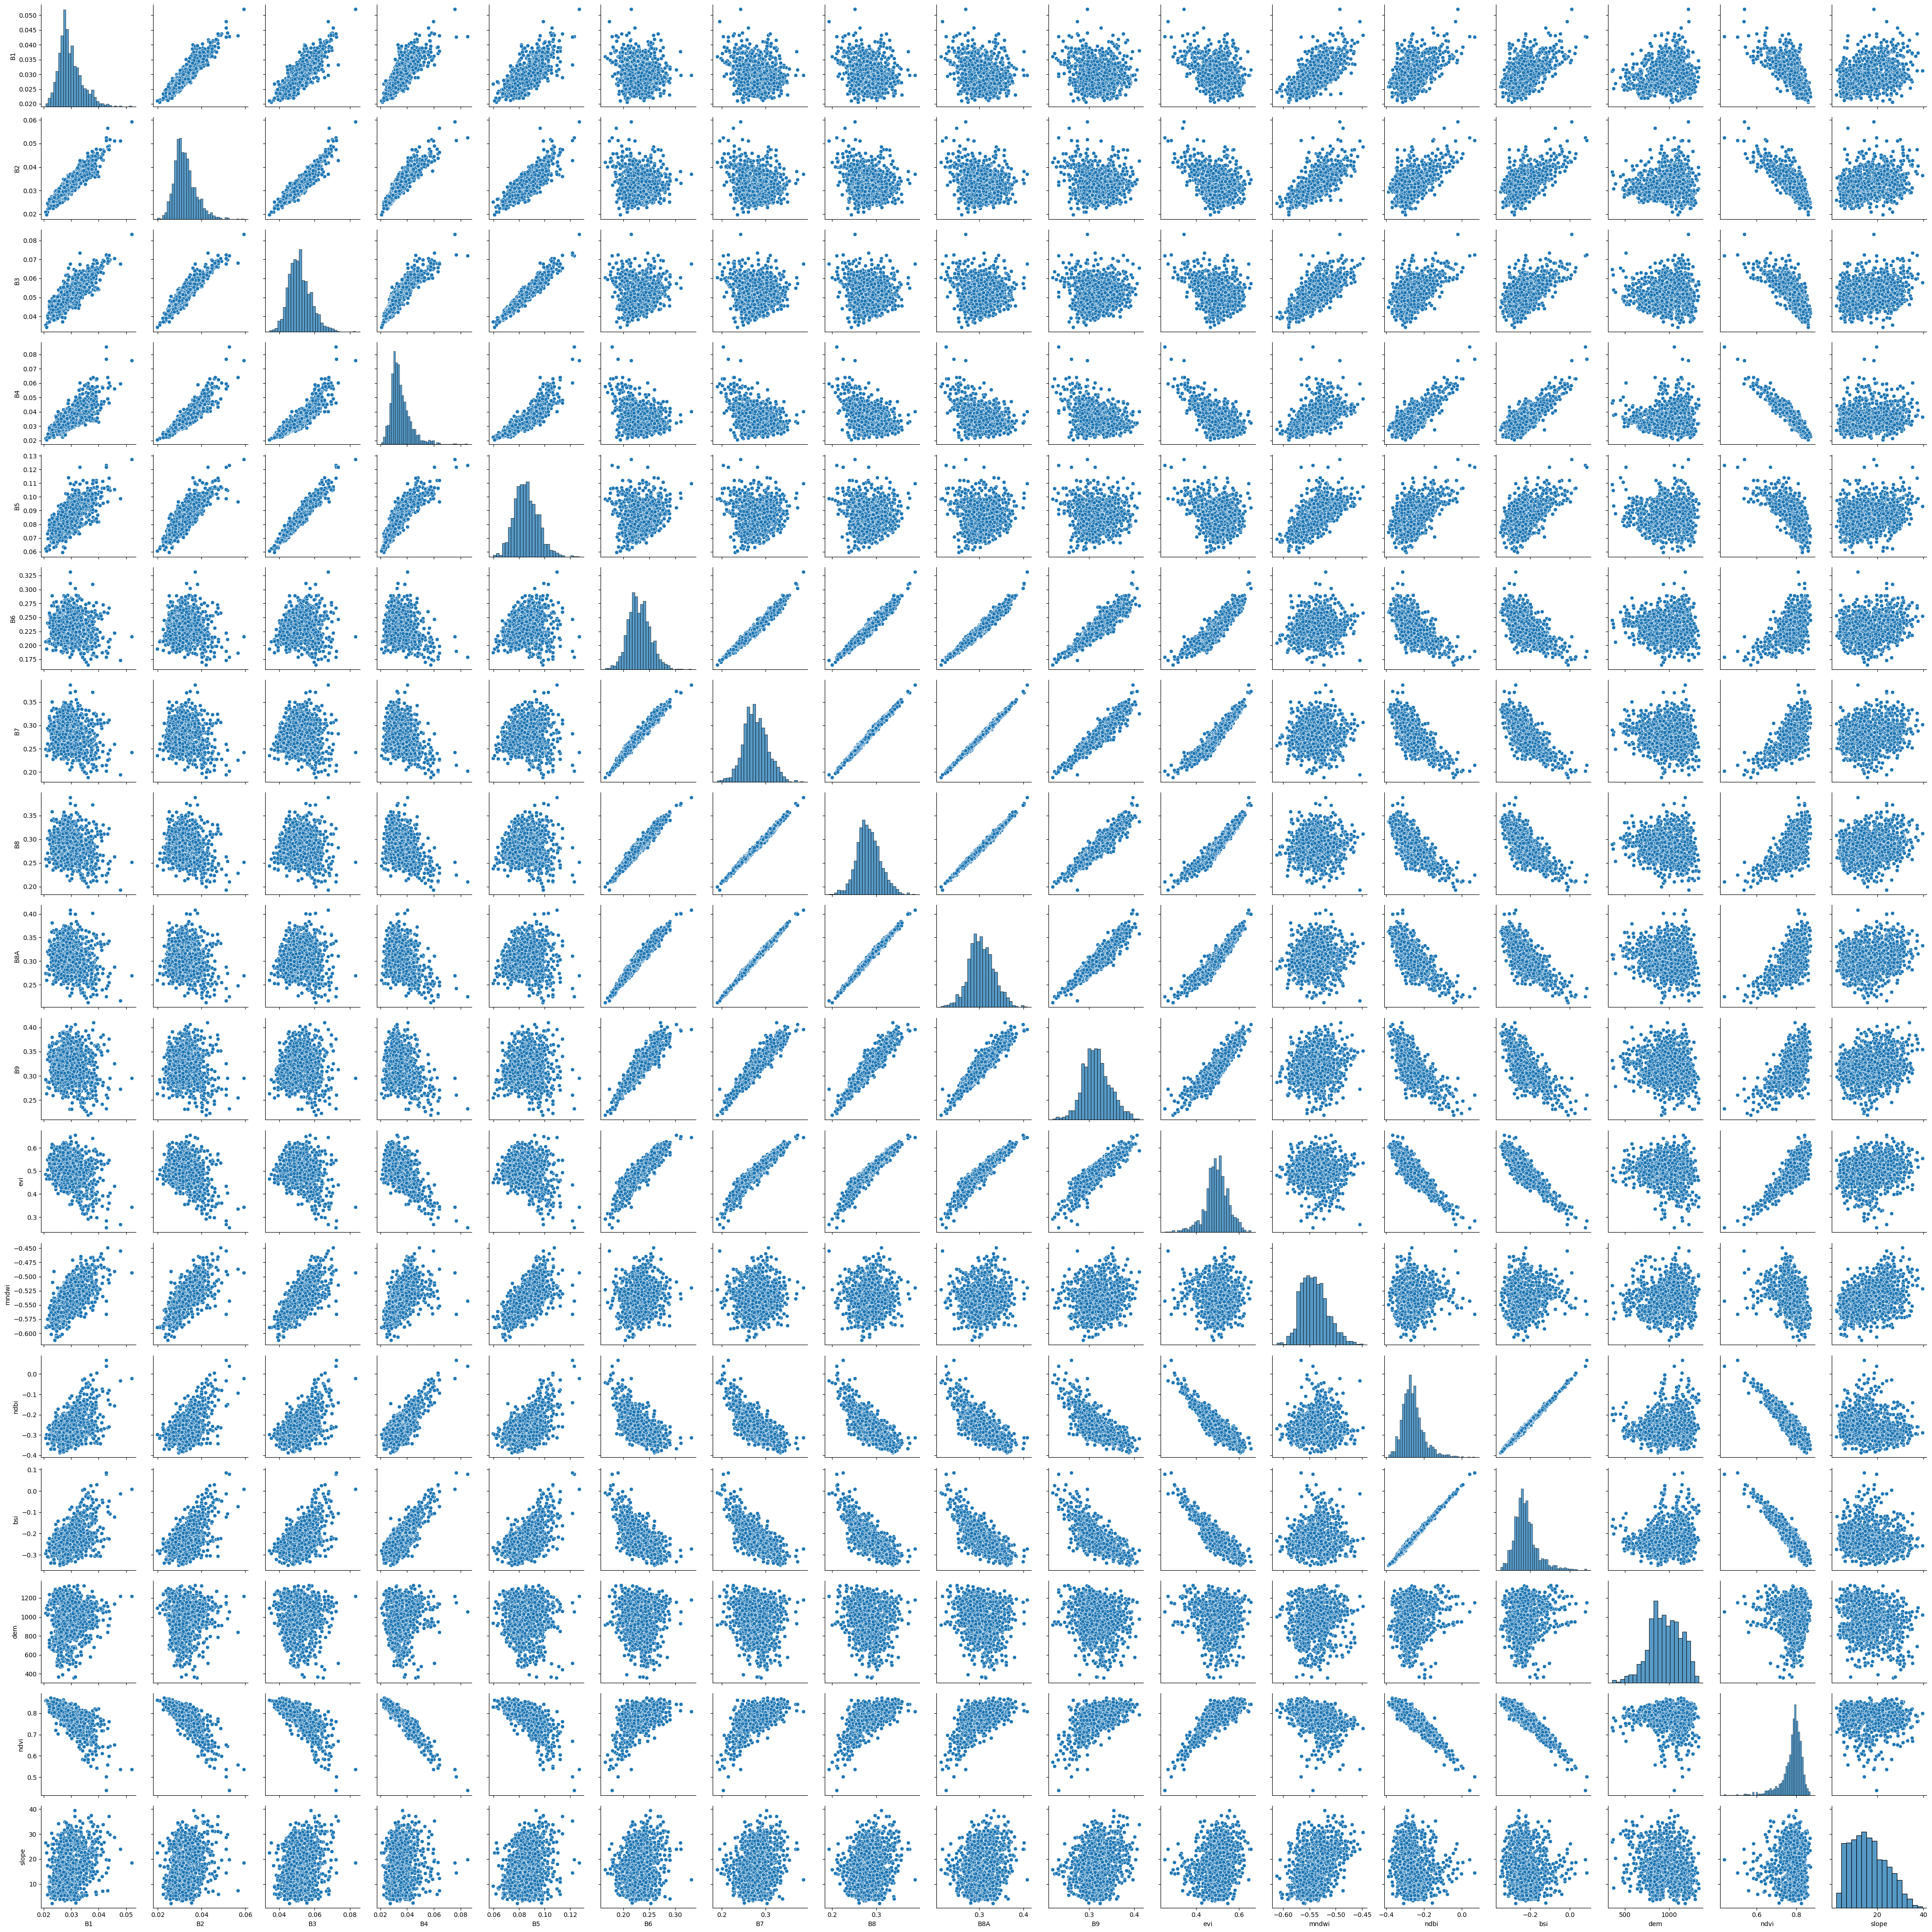

In [ ]:
import seaborn as sns
sns.pairplot(train[FEATURES])

# Adjust layout (optional)
plt.tight_layout()

# Display the pairplot
plt.show()

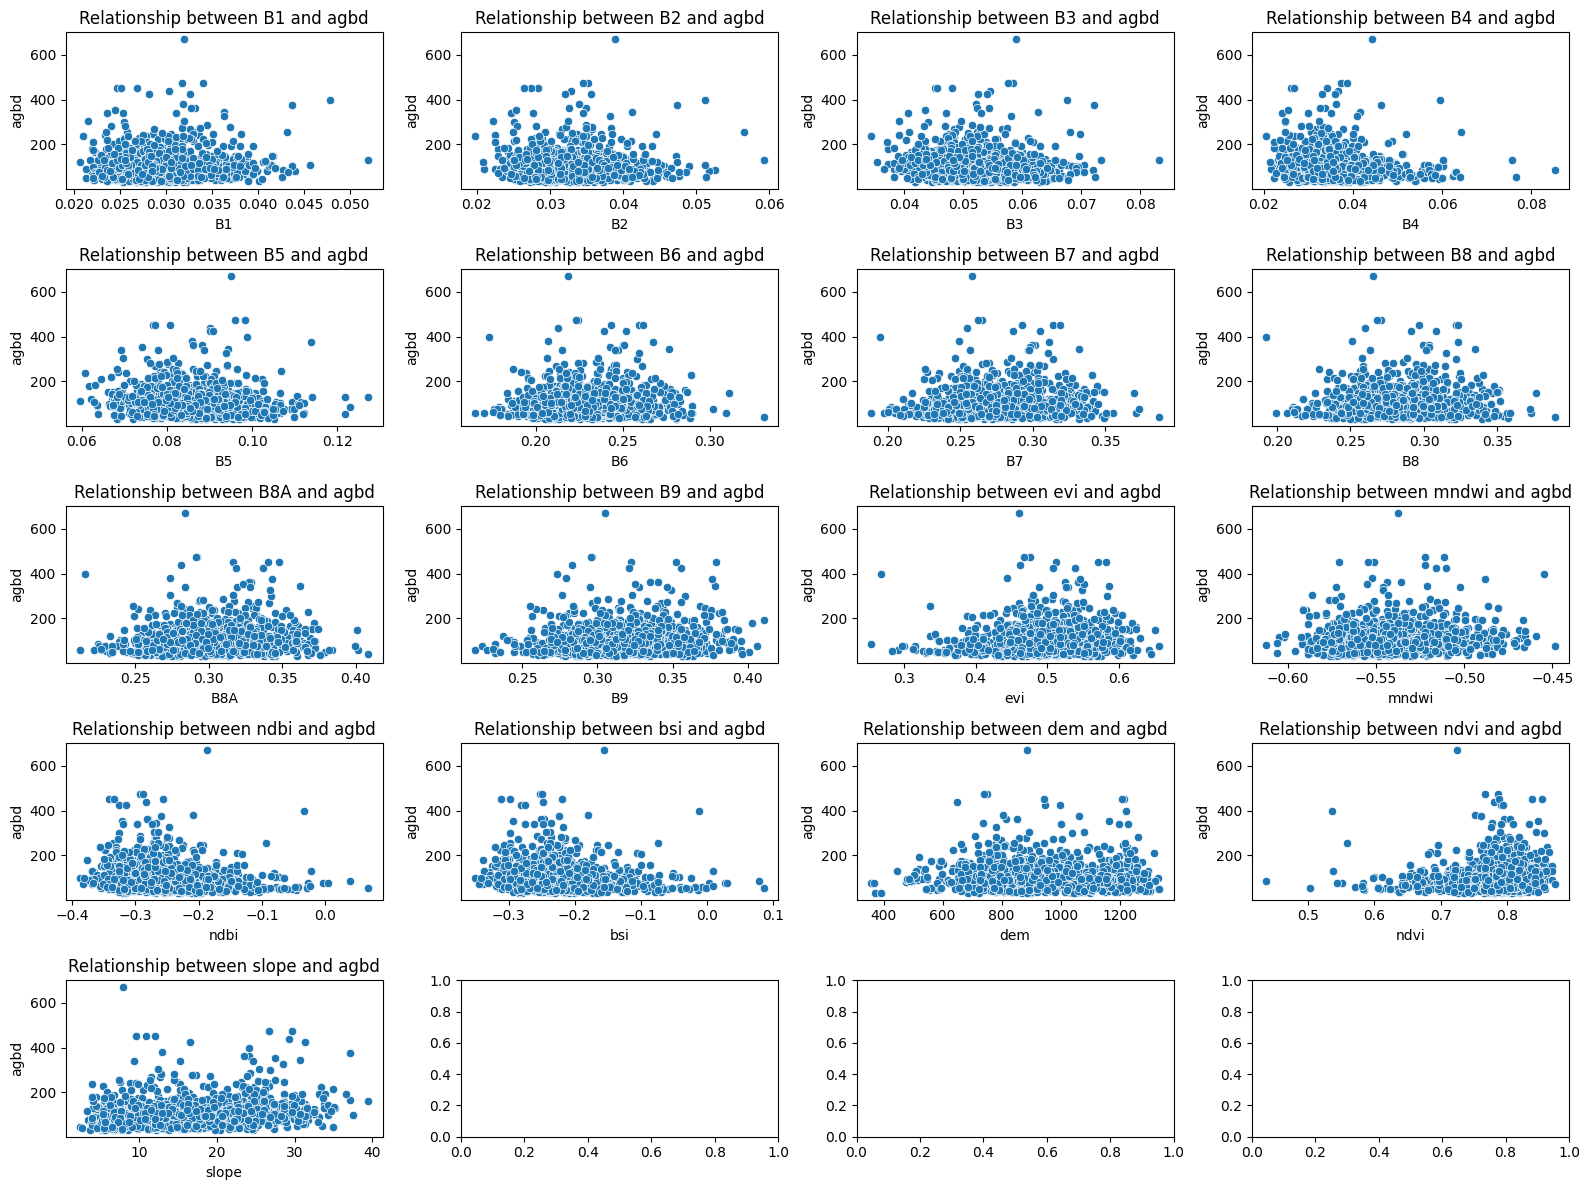

In [ ]:
fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(16, 12))

# Flatten the axes into a 1D array for easier iteration
axes_flat = axes.ravel()

# Loop through features and create scatter plots with labels
for i, feature in enumerate(FEATURES):
    sns.scatterplot(x=feature, y=LABEL[0], data=train, ax=axes_flat[i])  # Use axes_flat for indexing
    axes_flat[i].set_title(f"Relationship between {feature} and {LABEL[0]}")

# Adjust layout and spacing
plt.tight_layout()

# Display the scatter plots
plt.show()


Evaluation Metrics

1.	Mean Squared Error (MSE): MSE measures the average squared difference between the predicted biomass values (ŷ_i) and the actual biomass values (y_i). It emphasizes larger errors since squaring a number amplifies its magnitude. This makes MSE sensitive to outliers in the data. A lower MSE indicates a better model fit, as the predicted values are, on average, closer to the actual values.
Formula:
                                             


 2.   Mean Absolute Error (MAE): MAE measures the average absolute difference between predicted and actual biomass values. Unlike MSE, it doesn't square the errors, giving equal weight to all prediction discrepancies. This makes MAE less sensitive to outliers compared to MSE. A lower MAE indicates a better model fit, signifying that the model's predictions are, on average, closer to the actual values in terms of absolute difference.
Formula:
                                                 

3.	Root Mean Squared Error (RMSE): RMSE is the square root of MSE. It provides a measure of the spread of prediction errors around the mean, with the same scale as the original biomass data (e.g., tons per hectare). This makes it easier to interpret the error magnitude in the context of your biomass values. A lower RMSE indicates a better model fit, signifying that the model's predictions are, on average, closer to the actual values.
Formula:
                                              
4.	R-squared (R²): R-squared is a statistical measure that represents the proportion of variance in the actual biomass data that can be explained by the model's features. It ranges from 0 to 1, where a value closer to 1 indicates a better fit between the model's predictions and the actual data. An R² of 1 implies the model perfectly explains all the variance in the data (which is unlikely in real-world applications).
Formula:
                                         


BIOMASS MAPPING

Biomass mapping involves estimating the quantity and distribution of organic material in ecosystems, typically using remote sensing technologies like satellite imagery and LiDAR. This process aids in monitoring changes in vegetation,understanding ecosystem health and biodiversity. With a trained model, machine learning algorithms are applied to predict biomass quantities across a landscape based on input data such as satellite imagery, LiDAR data. The model learns patterns and relationships between these variables and biomass values, enabling accurate predictions for areas where biomass measurements are unavailable. This approach enhances biomass estimation efficiency and accuracy, facilitating better understanding of ecosystem dynamics, carbon sequestration, and biodiversity conservation efforts.

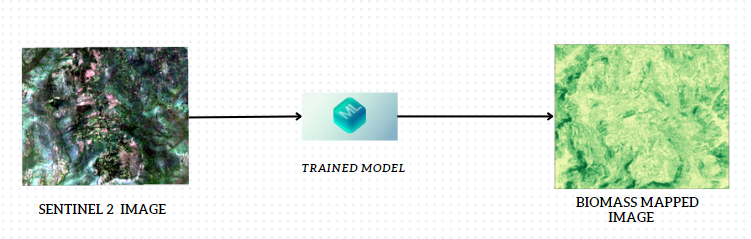

In [ ]:
Machine Learning Models

Machine Learning

Machine learning (ML) algorithms are computational tools designed to enable machines to learn patterns and relationships within data autonomously. These algorithms have found widespread use across various fields due to their capability to make predictions, decisions, and identify complex patterns without explicit programming. In environmental monitoring, ML plays a crucial role, particularly in analyzing satellite imagery. Satellite images provide a wealth of information about the Earth's surface, but extracting meaningful insights from these images can be challenging. ML algorithms excel at discerning intricate patterns and relationships within these vast datasets. In this project, ML algorithms are employed to accurately estimate biomass distribution in forested areas using Sentinel-2 imagery. The ML algorithms used in this project include Random Forest, Decision Tree, Support Vector Machine, Artificial Neural Network, Long Short-Term Memory, and Bidirectional Long Short-Term Memory.

1.	Random Forest:

        Random Forest is a popular machine learning algorithm that belongs to the ensemble learning category. It constructs multiple decision trees during training and outputs the average prediction of the individual trees, thus reducing the risk of overfitting. Random Forest is selected for this project due to its ability to handle large datasets with high dimensionality, such as satellite imagery data. It is robust to noise and outliers, making it suitable for complex and noisy datasets often encountered in environmental monitoring tasks like biomass estimation. Additionally, Random Forest provides insights into feature importance, allowing researchers to understand which spectral and spatial features contribute most to the estimation of biomass distribution in forested areas.


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


X_train=train.drop('agbd', axis=1)
X_test=test.drop('agbd', axis=1)
y_train=train['agbd']
y_test =test['agbd']
RF_model = RandomForestRegressor( random_state=47)

# Train the model on the training data
RF_model.fit(X_train, y_train)

# Make predictions on the training data
y_train_pred = RF_model.predict(X_train)

# Make predictions on the test data
y_test_pred = RF_model.predict(X_test)

# Calculate Mean Squared Error (MSE) and R-squared (R^2) for training and test sets
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Print the evaluation metrics
print("Mean Squared Error (Train):", train_mse)
print("R-squared (Train):", train_r2)
print("Mean Squared Error (Test):", test_mse)
print("R-squared (Test):", test_r2)
print("Accuracy", RF_model.score(X_test,y_test))


Mean Squared Error (Train): 503.3881084574698
R-squared (Train): 0.8743434470510665
Mean Squared Error (Test): 663.9286287729128
R-squared (Test): 0.8314572186796048
Accuracy 0.8314572186796048


Mean Squared Error (MSE): 663.9286287729128
Mean Absolute Error (MAE): 18.48489456402548
Root Mean Squared Error (RMSE): 25.766812545848833
R-squared (R2): 0.8314572186796048


<ipython-input-15-0eef0b1d4101>:19: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color='red', label='Ideal Prediction')


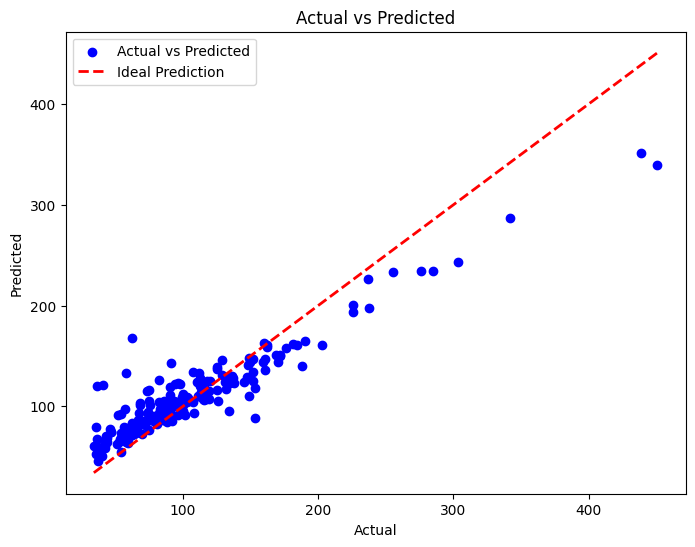

In [ ]:
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score

mse = mean_squared_error(y_test, y_test_pred)
mae = mean_absolute_error(y_test, y_test_pred)
rmse = np.sqrt(mse)
r_squared = r2_score(y_test, y_test_pred)

# Print metrics
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2):", r_squared)
# Visualize model's performance
import matplotlib.pyplot as plt

# Assuming y_test and y_pred are defined earlier
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_test_pred, color='blue', label='Actual vs Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color='red', label='Ideal Prediction')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.legend()
plt.show()


2.Decision Tree:

  Decision Tree is a machine learning algorithm that builds a tree-like structure by recursively partitioning the dataset based on the features that best separate the data into homogeneous subsets. Each internal node represents a feature, each branch represents a decision based on that feature, and each leaf node represents the outcome or prediction. Decision trees are selected for this project due to their simplicity, interpretability, and ability to handle both numerical and categorical data. They are particularly useful for understanding the relationships between different features and their impact on biomass distribution in forested areas. Additionally, decision trees can easily handle nonlinear relationships and interactions between variables, making them suitable for capturing the complex dynamics of forest ecosystems from satellite imagery.


In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import IsolationForest

# Assuming FEATURES contains the features that need to be scaled

# Copy original data to new variables for preprocessing
train_processed = train.copy()
test_processed = test.copy()

# 1. Outlier Detection and Removal
outlier_detector = IsolationForest(contamination=0.05)  # Adjust contamination as needed
outlier_detector.fit(train_processed[FEATURES])

# Detect outliers in the training data
outliers_train = outlier_detector.predict(train_processed[FEATURES])

# Remove outliers from the training data
train_processed = train_processed[outliers_train == 1]

# 2. Data Transformation (Normalization)
scaler = MinMaxScaler()

# Fit and transform the training data
train_processed[FEATURES] = scaler.fit_transform(train_processed[FEATURES])

# Transform the test data using the same scaler
test_processed[FEATURES] = scaler.transform(test_processed[FEATURES])

# Print the preprocessed DataFrame
print(train_processed)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


            B1        B2        B3        B4        B5        B6        B7  \
0     0.349118  0.300213  0.248969  0.235414  0.242141  0.193024  0.204288   
1     0.565765  0.574102  0.585544  0.458616  0.536644  0.597640  0.632085   
2     0.152671  0.237580  0.269275  0.174000  0.384627  0.694112  0.715908   
3     0.315077  0.403110  0.405867  0.310659  0.519535  0.340191  0.388428   
4     0.320513  0.294245  0.264454  0.181568  0.310116  0.521259  0.537638   
...        ...       ...       ...       ...       ...       ...       ...   
1195  0.301534  0.418722  0.455099  0.320803  0.482413  0.435522  0.457233   
1196  0.207306  0.262834  0.173618  0.137116  0.234503  0.498811  0.596017   
1197  0.616552  0.593955  0.692776  0.402705  0.710674  0.931209  0.894549   
1198  0.249568  0.285098  0.292342  0.210397  0.352830  0.449978  0.455979   
1199  0.352164  0.516366  0.488486  0.386951  0.475467  0.572117  0.649586   

            B8       B8A        B9       evi     mndwi      ndb

<ipython-input-21-3f7ea131fe01>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_processed[FEATURES] = scaler.fit_transform(train_processed[FEATURES])


            B1        B2        B3        B4        B5        B6        B7  \
0     0.349118  0.260809  0.236477  0.220717  0.220277  0.171674  0.173457   
1     0.565765  0.549023  0.578650  0.444440  0.537322  0.585686  0.594190   
2     0.152671  0.194900  0.257121  0.159159  0.373669  0.684397  0.676629   
3     0.315077  0.369088  0.395985  0.296137  0.518904  0.322258  0.354556   
4     0.320513  0.254528  0.252220  0.166745  0.293455  0.507531  0.501302   
...        ...       ...       ...       ...       ...       ...       ...   
1195  0.301534  0.385517  0.446036  0.306305  0.478940  0.419803  0.422225   
1196  0.207306  0.221475  0.159873  0.122189  0.212054  0.484561  0.558718   
1197  0.616552  0.569914  0.687666  0.388398  0.724672  0.927001  0.852320   
1198  0.249568  0.244904  0.280572  0.195641  0.339439  0.434594  0.420992   
1199  0.352164  0.488267  0.479979  0.372607  0.471462  0.559569  0.611402   

            B8       B8A        B9       evi     mndwi      ndb

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
<ipython-input-22-3f7ea131fe01>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_processed[FEATURES] = scaler.fit_transform(train_processed[FEATURES])


In [ ]:
from sklearn.tree import DecisionTreeRegressor


X_train=  train_processed.drop('agbd', axis=1)
y_train=  train_processed['agbd']
X_test=test_processed.drop('agbd', axis=1)
y_test= test_processed['agbd']
model = DecisionTreeRegressor(random_state=50,ccp_alpha=0.01,max_depth=32,min_samples_split=7,min_samples_leaf=1)
model.fit(X_train, y_train)


    # Make predictions on the training data
y_train_pred = model.predict(X_train)

    # Make predictions on the test data
y_test_pred = model.predict(X_test)

    # Calculate Mean Squared Error (MSE) and R-squared (R^2) for training and test sets
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

    # Print the evaluation metrics for the current random_state value
print("Mean Squared Error (Train):", train_mse)
print("R-squared (Train):", train_r2)
print("Mean Squared Error (Test):", test_mse)
print("R-squared (Test):", test_r2)
print("Accuracy:", model.score(X_test, y_test))
print()

 min_samples_leaf: 39
Mean Squared Error (Train): 637.3370930484699
R-squared (Train): 0.8380140289329554
Mean Squared Error (Test): 1006.7615557546587
R-squared (Test): 0.7444267570643113
Accuracy: 0.7444267570643113



Mean Squared Error (MSE): 1006.7615557546587
Mean Absolute Error (MAE): 16.16271579931507
Root Mean Squared Error (RMSE): 31.729506074861277
R-squared (R2): 0.7444267570643113


<ipython-input-97-0eef0b1d4101>:19: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color='red', label='Ideal Prediction')


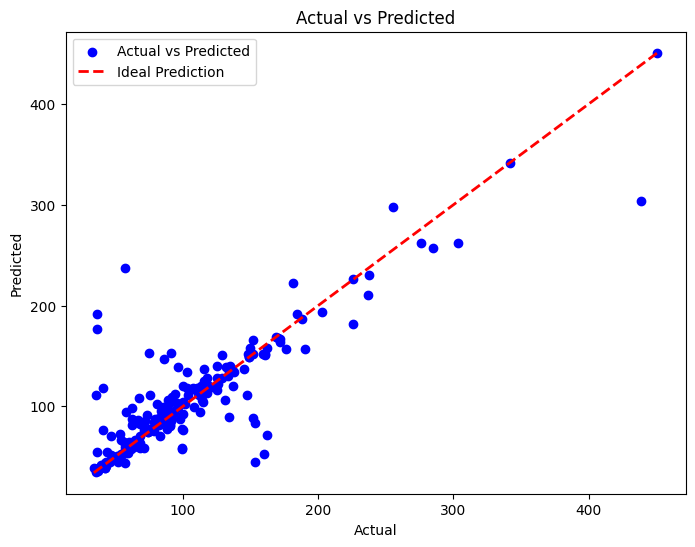

In [ ]:
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score

mse = mean_squared_error(y_test, y_test_pred)
mae = mean_absolute_error(y_test, y_test_pred)
rmse = np.sqrt(mse)
r_squared = r2_score(y_test, y_test_pred)

# Print metrics
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2):", r_squared)
# Visualize model's performance
import matplotlib.pyplot as plt

# Assuming y_test and y_pred are defined earlier
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_test_pred, color='blue', label='Actual vs Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color='red', label='Ideal Prediction')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.legend()
plt.show()


3.Support Vector Machine (SVM):

  Support Vector Machine Support Vector Machine (SVM) is a powerful machine learning algorithm used for classification and regression tasks. It works by finding the hyperplane that best separates the data into different classes while maximizing the margin between the classes. SVM is selected for this project due to its effectiveness in handling high-dimensional data, making it suitable for analyzing satellite imagery with numerous spectral bands. Additionally, SVM can handle non-linear relationships between features through the use of kernel functions, allowing it to capture complex patterns in biomass distribution within forested areas. SVM's ability to generalize well to unseen data and its robustness to overfitting make it a valuable tool for accurately estimating biomass distribution based on satellite imagery.


In [ ]:
x_train, y_train = train.drop(LABEL, axis=1), train[LABEL]
x_test, y_test = test.drop(LABEL, axis=1), test[LABEL]

from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(x_train)
y = sc_y.fit_transform(y_train)
X2 = sc_X.fit_transform(x_test)


In [ ]:
import numpy as np
from sklearn.metrics import r2_score
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf',C=6,gamma=0.419)
regressor.fit(X, y)

y_pred_svm = regressor.predict(X)

y_pred_svm = y_pred_svm.reshape(-1, 1)
y_pred_svm = sc_y.inverse_transform(y_pred_svm)
# Calculate R-squared for test set
r_squared_svm = r2_score(y_train, y_pred_svm)
y_pred = regressor.predict(X2)
y_pred = y_pred.reshape(-1, 1)

y_pred = sc_y.inverse_transform(y_pred)
print("R-squared on test set (SVM):", r_squared_svm)
# Make predictions on the test set
# Calculate R-squared for test set
r_squared_svm = r2_score(y_test, y_pred)
print("R-squared on test set (SVM):", r_squared_svm)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


R-squared on test set (SVM): 0.8683604035086039
R-squared on test set (SVM): 0.7810262642184482


Mean Squared Error (MSE): 862.5877121272774
Mean Absolute Error (MAE): 17.419806297581644
Root Mean Squared Error (RMSE): 29.369843583636555
R-squared (R2): 0.7810262642184482


<ipython-input-106-50e9e93119fc>:20: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color='red', label='Ideal Prediction')


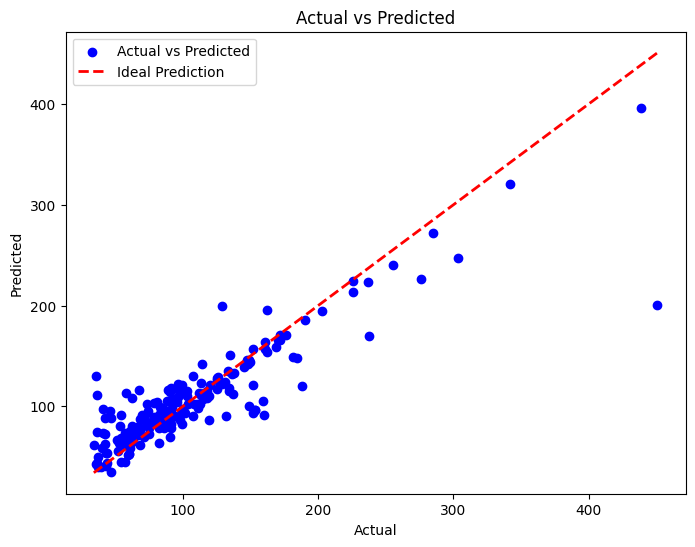

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
r_squared = r2_score(y_test, y_pred)

# Print metrics
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2):", r_squared)
# Visualize model's performance
import matplotlib.pyplot as plt

# Assuming y_test and y_pred are defined earlier
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', label='Actual vs Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color='red', label='Ideal Prediction')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.legend()
plt.show()


4.Artificial Neural Network:

Artificial Neural Network (ANN) is a computational model inspired by the structure and function of the human brain's neural networks. It consists of interconnected nodes organized in layers, including an input layer, one or more hidden layers, and an output layer. Each node applies a mathematical function to the weighted sum of its inputs and passes the result through an activation function to produce an output. ANN is chosen for this project due to its ability to learn complex patterns and relationships in data, making it suitable for analyzing the intricate features present in satellite imagery. ANN excels at capturing non-linear relationships and can adaptively adjust its parameters during training to improve performance. Additionally, ANN's flexibility allows it to handle various types of data, including numerical and categorical variables, making it a versatile choice for biomass estimation based on satellite imagery.


In [9]:
x_train, y_train = train.drop(LABEL, axis=1), train[LABEL]
x_test, y_test = test.drop(LABEL, axis=1), test[LABEL]
from sklearn.preprocessing import StandardScaler

def scale_datasets(x_train, x_test):
  standard_scaler = StandardScaler()
  x_train_scaled = pd.DataFrame(
      standard_scaler.fit_transform(x_train),
      columns=x_train.columns
  )
  x_test_scaled = pd.DataFrame(
      standard_scaler.transform(x_test),
      columns = x_test.columns
  )
  return x_train_scaled, x_test_scaled
x_train_scaled, x_test_scaled = scale_datasets(x_train, x_test)
print(x_train_scaled)

            B1        B2        B3        B4        B5        B6        B7  \
0    -0.277322 -0.794118 -1.054659 -0.677025 -1.351180 -1.357199 -1.338953   
1     0.776815  0.584599  0.706010  0.406618  0.357513  0.696647  0.763869   
2    -1.233172 -1.109401 -0.948434 -0.975193 -0.524480  1.186338  1.175900   
3    -0.442956 -0.276148 -0.233904 -0.311714  0.258250 -0.610173 -0.433820   
4    -0.416505 -0.824161 -0.973653 -0.938449 -0.956791  0.308935  0.299618   
...        ...       ...       ...       ...       ...       ...       ...   
1195 -0.508852 -0.197558  0.023636 -0.262465  0.042869 -0.126269 -0.095610   
1196 -0.967336 -0.982278 -1.448830 -1.154265 -1.395494  0.194983  0.586581   
1197  1.023930  0.684537  1.266953  0.135169  1.367226  2.389854  2.054003   
1198 -0.761703 -0.870203 -0.827765 -0.798485 -0.708964 -0.052894 -0.101773   
1199 -0.262502  0.293966  0.198290  0.058685  0.002569  0.567088  0.849895   

            B8       B8A        B9       evi     mndwi      ndb

In [ ]:
hidden_units1 = 160
hidden_units2 = 480
hidden_units3 = 256
learning_rate = 0.02


In [ ]:
train_shape = x_train_scaled.shape
input_shape = (train_shape[1])

In [ ]:
import tensorflow as tf

# Assuming you've saved the model using TensorFlow
# Path to the saved model directory
model_path = '/content/ANN_model.keras'

# Load the model
model = tf.keras.models.load_model(model_path)

# Now you can use this loaded_model for inference or further training


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from keras.models import Sequential
from keras.layers import Dense, Dropout, Input
from keras.optimizers import Adam
from keras.losses import MeanSquaredLogarithmicError
from keras.callbacks import Callback

neuron = 128
drop = 0.2

model = Sequential([
  Input(input_shape),

  Dense(neuron * 4, activation='relu'),
  Dropout(drop),
  Dense(neuron * 2, activation='relu'),
  Dropout(drop),
  Dense(neuron * 1, activation='relu'),
  Dropout(drop),
  Dense(1, activation='relu')
])


In [ ]:
from sklearn.metrics import r2_score
from keras.callbacks import Callback

from keras.callbacks import Callback
from sklearn.metrics import r2_score



# Define the R-squared callback with the desired threshold



# Compile the model
model.compile(
    optimizer='Adam',
    loss='mse',
    metrics=['MeanSquaredError']
)

# Create callback to stop training if loss not decreasing



# Fit the model
result = model.fit(
    x=x_train_scaled, y=y_train,
    validation_data=(x_train_scaled, y_train),
    batch_size=32,
    epochs=100,
)

# Make predictions on the test set
y_pred = model.predict(x_test_scaled)

# Calculate R-squared score
r_squared = r2_score(y_test, y_pred)
print("R-squared on test set:", r_squared)


Epoch 1/100
38/38 [==============================] - 1s 9ms/step - loss: 1360.4268 - mean_squared_error: 1360.4268 - val_loss: 721.4096 - val_mean_squared_error: 721.4096
Epoch 2/100
38/38 [==============================] - 0s 5ms/step - loss: 1354.3911 - mean_squared_error: 1354.3911 - val_loss: 741.7327 - val_mean_squared_error: 741.7327
Epoch 3/100
38/38 [==============================] - 0s 5ms/step - loss: 1337.8621 - mean_squared_error: 1337.8621 - val_loss: 717.2875 - val_mean_squared_error: 717.2875
Epoch 4/100
38/38 [==============================] - 0s 5ms/step - loss: 1387.5745 - mean_squared_error: 1387.5745 - val_loss: 677.1914 - val_mean_squared_error: 677.1914
Epoch 5/100
38/38 [==============================] - 0s 5ms/step - loss: 1402.2286 - mean_squared_error: 1402.2286 - val_loss: 726.6957 - val_mean_squared_error: 726.6957
Epoch 6/100
38/38 [==============================] - 0s 5ms/step - loss: 1361.5109 - mean_squared_error: 1361.5109 - val_loss: 673.9274 - val_mea

Mean Squared Error (MSE): 726.297988131734
Mean Absolute Error (MAE): 20.501208337158985
Root Mean Squared Error (RMSE): 26.949916291738905
R-squared (R2): 0.8156243341797522


<ipython-input-24-06019594ad3b>:19: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color='green', label='Ideal Prediction')


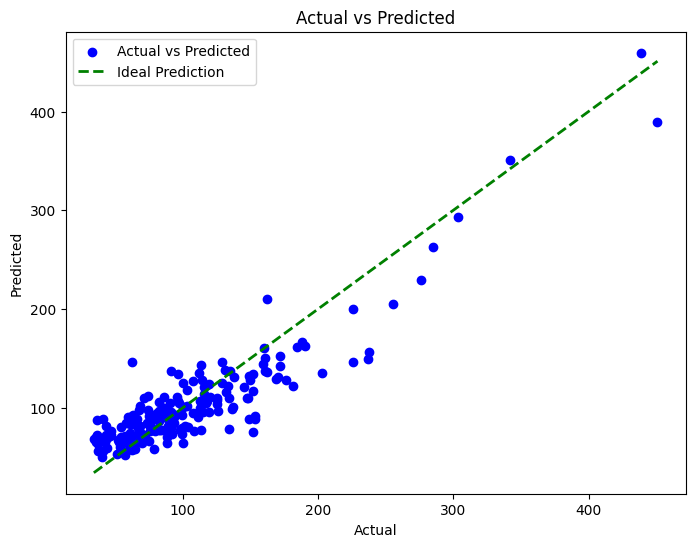

In [ ]:
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
r_squared = r2_score(y_test, y_pred)

# Print metrics
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2):", r_squared)
# Visualize model's performance
import matplotlib.pyplot as plt

# Assuming y_test and y_pred are defined earlier
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', label='Actual vs Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color='green', label='Ideal Prediction')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.legend()
plt.show()


5. Long Short-Term Memory (LSTM):
Long Short-Term Memory (LSTM) is a type of recurrent neural network (RNN) architecture designed to handle the issue of vanishing gradients encountered in traditional RNNs. LSTM networks are composed of memory cells that can maintain information over long sequences, allowing them to capture temporal dependencies in sequential data effectively. LSTM networks include gates that control the flow of information into and out of the memory cells, such as input, forget, and output gates. In this project, LSTM is utilized to capture temporal patterns and dependencies in satellite imagery data, enabling accurate estimation of biomass distribution in forested areas.


In [45]:
from keras.models import Sequential
from keras.layers import Dense, LSTM,Dropout
from tensorflow.keras.optimizers import Adam
from keras.callbacks import Callback
import numpy as np

from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(x_train)
y = sc_y.fit_transform(y_train)
X2 = sc_X.fit_transform(x_test)

# Define the model architecture
Lstm_model = Sequential([
    LSTM(64, activation='relu', input_shape=(X.shape[1], 1)),
    Dropout(0.2),

    Dense(32, activation='relu'),  # Additional Dense layer
    Dropout(0.2),

    Dense(1)
])

optimizer = Adam(learning_rate=0.001)

# Compile the model
Lstm_model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])  # You can adjust the optimizer and loss function as needed
Lstm_model.fit(X, y, epochs=100, batch_size=16, validation_split=0.2)  # Adjust epochs and batch_size as needed


Epoch 1/100
60/60 [==============================] - 3s 26ms/step - loss: 0.9964 - mae: 0.6813 - val_loss: 0.9745 - val_mae: 0.6496
Epoch 2/100
60/60 [==============================] - 1s 10ms/step - loss: 0.9826 - mae: 0.6749 - val_loss: 0.9654 - val_mae: 0.6410
Epoch 3/100
60/60 [==============================] - 1s 9ms/step - loss: 0.9766 - mae: 0.6669 - val_loss: 0.9378 - val_mae: 0.6510
Epoch 4/100
60/60 [==============================] - 1s 9ms/step - loss: 0.9793 - mae: 0.6726 - val_loss: 0.9391 - val_mae: 0.6350
Epoch 5/100
60/60 [==============================] - 1s 9ms/step - loss: 0.9701 - mae: 0.6570 - val_loss: 0.9260 - val_mae: 0.6493
Epoch 6/100
60/60 [==============================] - 1s 9ms/step - loss: 0.9760 - mae: 0.6681 - val_loss: 0.9203 - val_mae: 0.6416
Epoch 7/100
60/60 [==============================] - 1s 9ms/step - loss: 0.9645 - mae: 0.6624 - val_loss: 0.9243 - val_mae: 0.6310
Epoch 8/100
60/60 [==============================] - 0s 7ms/step - loss: 0.9583 -

In [46]:
import tensorflow as tf

# Assuming you've saved the model using TensorFlow
# Path to the saved model directory
model_path = '/content/lstmmodel2.keras'

# Load the model
Lstm_model = tf.keras.models.load_model(model_path)



In [47]:
# Now you can use this loaded_model for inference or further training

# Train the model with custom callback
#Lstm_model.fit(X, y, epochs=100, batch_size=16, validation_split=0.2)  # Adjust epochs and batch_size as needed
y_pred_svm = Lstm_model.predict(X)
y_pred_svm = y_pred_svm.reshape(-1, 1)
y_pred_svm = sc_y.inverse_transform(y_pred_svm)
# Calculate R-squared for test set
r_squared_svm = r2_score(y_train, y_pred_svm)
print("R-squared on Train set  :", r_squared_svm)
y_pred = Lstm_model.predict(X2)
y_pred = y_pred.reshape(-1, 1)

y_pred = sc_y.inverse_transform(y_pred)
# Make predictions on the test set
# Calculate R-squared for test set
r_squared_svm = r2_score(y_test, y_pred)
print("R-squared on test set  :", r_squared_svm)

38/38 [==============================] - 0s 5ms/step
R-squared on Train set  : 0.7775486344169322
7/7 [==============================] - 0s 5ms/step
R-squared on test set  : 0.7490254640955992


Mean Squared Error (MSE): 988.6461951946162
Mean Absolute Error (MAE): 19.891664053486423
Root Mean Squared Error (RMSE): 31.44274471471306
R-squared (R2): 0.7490254640955992


<ipython-input-49-06019594ad3b>:19: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color='green', label='Ideal Prediction')


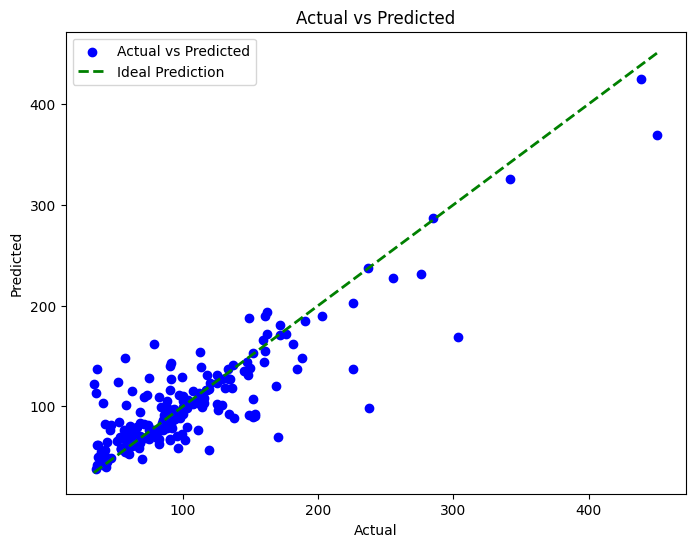

In [49]:
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
r_squared = r2_score(y_test, y_pred)

# Print metrics
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2):", r_squared)
# Visualize model's performance
import matplotlib.pyplot as plt

# Assuming y_test and y_pred are defined earlier
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', label='Actual vs Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color='green', label='Ideal Prediction')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.legend()
plt.show()



6.Bidirectional Long Short-Term Memory (BiLSTM) :


Bidirectional Long Short-Term Memory (BiLSTM) is an extension of the traditional LSTM architecture that incorporates information from both past and future time steps when making predictions. BiLSTM consists of two LSTM layers, one processing the input sequence in a forward direction and the other processing it in a backward direction. This bidirectional processing allows the network to capture dependencies from both past and future contexts, making it particularly effective for tasks where understanding the entire sequence is crucial. In  this project, BiLSTM is employed to analyze sequential satellite imagery data, enabling the model to capture temporal patterns and contextual dependencies effectively. BiLSTM enhances the accuracy of biomass estimation , thereby improving the overall performance of the machine learning model.


In [50]:
from keras.layers import Dense, LSTM, Bidirectional
from keras.callbacks import Callback
from keras.layers import Bidirectional

In [69]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Bidirectional
from keras.callbacks import Callback
import numpy as np



# Define the model architecture
bilstm_model = Sequential([
    Bidirectional(LSTM(128, activation='relu'), input_shape=(X.shape[1], 1)),
    Dropout(0.2),
    Dense(64, activation='relu'),  # Additional Dense layer
    Dropout(0.2),
   # Dense(32, activation='relu'),  # Additional Dense layer
    Dense(1)
])

# Compile the model
bilstm_model.compile(optimizer='adam', loss='mse', metrics=['mae'])  # You can adjust the optimizer and loss function as needed
bilstm_model.fit(X, y, epochs=100, batch_size=16, validation_split=0.2)  # Adjust epochs and batch_size as needed



Epoch 1/100
60/60 [==============================] - 5s 31ms/step - loss: 1.0028 - mae: 0.6826 - val_loss: 0.9774 - val_mae: 0.6386
Epoch 2/100
60/60 [==============================] - 1s 22ms/step - loss: 0.9969 - mae: 0.6866 - val_loss: 0.9664 - val_mae: 0.6346
Epoch 3/100
60/60 [==============================] - 2s 27ms/step - loss: 0.9750 - mae: 0.6630 - val_loss: 0.9460 - val_mae: 0.6265
Epoch 4/100
60/60 [==============================] - 2s 31ms/step - loss: 0.9726 - mae: 0.6644 - val_loss: 0.9136 - val_mae: 0.6434
Epoch 5/100
60/60 [==============================] - 1s 18ms/step - loss: 0.9675 - mae: 0.6632 - val_loss: 0.9237 - val_mae: 0.6186
Epoch 6/100
60/60 [==============================] - 1s 16ms/step - loss: 0.9596 - mae: 0.6573 - val_loss: 0.9082 - val_mae: 0.6305
Epoch 7/100
60/60 [==============================] - 1s 16ms/step - loss: 0.9565 - mae: 0.6577 - val_loss: 0.9115 - val_mae: 0.6231
Epoch 8/100
60/60 [==============================] - 1s 15ms/step - loss: 0.

In [74]:
import tensorflow as tf

# Assuming you've saved the model using TensorFlow
# Path to the saved model directory
model_path = '/content/bilstm_model3.keras'

# Load the model
bilstm_model = tf.keras.models.load_model(model_path)

# Now you can use this loaded_model for inference or further training


In [75]:
# Train the model with custom callback
y_pred_svm = bilstm_model.predict(X)
y_pred_svm = y_pred_svm.reshape(-1, 1)
y_pred_svm = sc_y.inverse_transform(y_pred_svm)
# Calculate R-squared for test set
r_squared_svm = r2_score(y_train, y_pred_svm)
y_pred = bilstm_model.predict(X2)
y_pred = y_pred.reshape(-1, 1)

y_pred = sc_y.inverse_transform(y_pred)
print("R-squared on train set:", r_squared_svm)
# Make predictions on the test set
# Calculate R-squared for test set
r_squared_svm = r2_score(y_test, y_pred)
print("R-squared on test set :", r_squared_svm)

7/7 [==============================] - 0s 5ms/step
R-squared on train set: 0.8881507143584672
R-squared on test set : 0.7745873570783705


Mean Squared Error (MSE): 887.9520425056953
Mean Absolute Error (MAE): 19.19380691248854
Root Mean Squared Error (RMSE): 29.798524166570655
R-squared (R2): 0.7745873570783705


<ipython-input-76-06019594ad3b>:19: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color='green', label='Ideal Prediction')


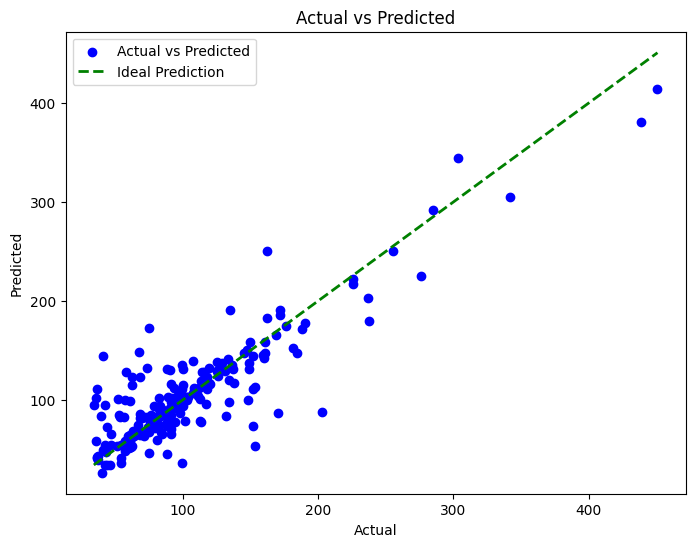

In [76]:
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
r_squared = r2_score(y_test, y_pred)

# Print metrics
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2):", r_squared)
# Visualize model's performance
import matplotlib.pyplot as plt

# Assuming y_test and y_pred are defined earlier
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', label='Actual vs Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color='green', label='Ideal Prediction')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.legend()
plt.show()


Result and Discussion:

 * Various machine learning models were compared for biomass estimation in forested areas, including Random Forest, Support Vector Machine (SVM), Artificial Neural Network (ANN), Long Short-Term Memory (LSTM), Bidirectional Long Short-Term Memory (BiLSTM), and Decision Tree.

* Random Forest, ANN, and Decision Tree models exhibited lower error metrics such as Mean Squared Error (MSE), Mean Absolute Error (MAE), and Root Mean Squared Error (RMSE), indicating higher accuracy in predicting biomass distribution compared to other models.

* Among the models tested, Random Forest stood out as the most suitable choice, achieving superior accuracy with an MSE of 663.93, an MAE of 18.48, an RMSE of 25.77, and an R² of 0.8315.



* Random Forest's ability to capture complex relationships while mitigating overfitting, along with its simplicity, interpretability, and scalability, makes it the preferred model for biomass estimation in forested areas, providing valuable insights for environmental management and sustainability efforts.










